In [173]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [174]:
f = h5py.File('/home/dataset/sift/sift-128-euclidean.hdf5')

In [175]:
f.keys()

<KeysViewHDF5 ['distances', 'neighbors', 'test', 'train']>

In [176]:
base = f['train'][:]
queries = f['test'][:]

In [177]:
bucket_path = "/tmp/buckets.bin"
index_path = "/tmp/test_performance/pagraph"

In [178]:
gt = f['neighbors']

In [184]:
# 统计每个桶的命中率
def plot_hit(ax, query = 200, bucket_path = "/tmp/stat/bucket.txt"):
  gt_i = gt[query]
  rest = set(gt_i)
  hits = []
  issue_size = []
  fb = open(bucket_path, "r")
  lines = reversed(fb.readlines())
  for line in lines:
    if line is None:
      break
    line_split = line.split(' ')[:-1]
    line_num = [int(i) for i in line_split]
    issue_size.append(len(line_num))
    hit = set(line_num).intersection(rest)
    hit_number = len(hit)
    rest = rest.difference(hit)
    hits.append (hit_number)
  fb.close()
  
  ax.plot(list(range(1, len(hits) + 1)), list(hits))
  ax.set_xlabel('bucket seq number')
  ax.set_ylabel('hit number')
  ax.set_title("Recall@100 Hit")
  return sum(hits)

In [224]:
# 统计每个桶的命中率
def plot_hit2(ax, query = 200, bucket_path = "/tmp/stat/bucket.txt"):
  gt_i = gt[query]
  rest = set(gt_i)
  hits = []
  issue_size = []
  fb = open(bucket_path, "r")
  lines = reversed(fb.readlines())
  for line in lines:
    if line is None:
      break
    line_split = line.split(' ')[1:-1]
    line_num = [int(i) for i in line_split]
    issue_size.append(len(line_num))
    hit = set(line_num).intersection(rest)
    hit_number = len(hit)
    rest = rest.difference(hit)
    hits.append (hit_number)
  fb.close()
  
  ax.plot(list(range(1, len(hits) + 1)), list(hits))
  ax.set_xlabel('bucket seq number')
  ax.set_ylabel('hit number')
  ax.set_title("Recall@100 Hit")
  return sum(hits)

99

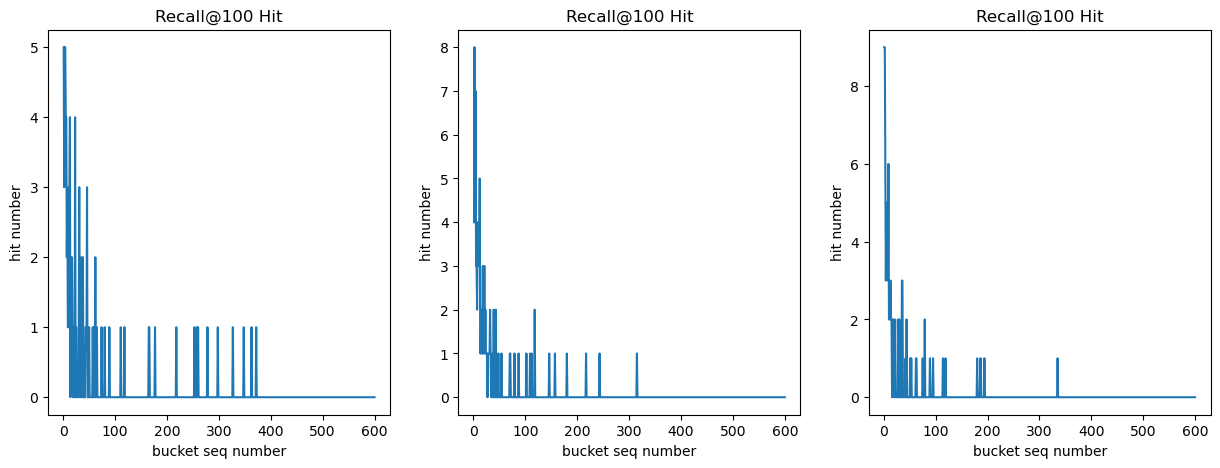

In [225]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
plot_hit(ax[0])
plot_hit(ax[1], 1024, "/tmp/stat/bucket2.txt")
plot_hit(ax[2], 2222, "/tmp/stat/bucket.3txt")

In [226]:
# import matplotlib.pyplot as plt
# plt.plot(list(range(1, len(hits) + 1)), list(reversed(issue_size)))
# plt.plot(list(range(1, len(hits) + 1)), list(reversed(hits)))

In [227]:
# 统计每个桶的命中率
def dist_fn(v1, v2):
  return np.square(v1 - v2).sum()

def plot_dist(ax, qi = 200, bucket_path = "/tmp/stat/bucket.txt"):
  query = queries[qi]
  
  # gt_i = gt[query]
  # rest = set(gt_i)
  # hits = []
  # issue_size = []
  fb = open(bucket_path, "r")
  lines = reversed(fb.readlines())
  dists = []
  for line in lines:
    if line is None:
      break
    line_split = line.split(' ')[:-1]
    line_num = [int(i) for i in line_split]
    gid = line_num[0]
    dists.append(dist_fn(base[gid], query))
  fb.close()

  ax.plot(list(range(1, len(dists) + 1)), dists)
  ax.set_xlabel('bucket seq number')
  ax.set_ylabel('dist')
  ax.set_title("Recall@100 Hit")


In [228]:
# 统计每个桶的命中率
def dist_fn(v1, v2):
  return np.square(v1 - v2).sum()

def plot_mean_dist(ax, qi = 200, bucket_path = "/tmp/stat/bucket.txt"):
  query = queries[qi]
  
  # gt_i = gt[query]
  # rest = set(gt_i)
  # hits = []
  # issue_size = []
  fb = open(bucket_path, "r")
  lines = reversed(fb.readlines())
  dists = []
  for line in lines:
    if line is None:
      break

    inner_dists = []
    line_split = line.split(' ')[:-1]
    line_num = [int(i) for i in line_split]
    inner_dists = [dist_fn(base[iid], query) for iid in line_num]
    dists.append(np.mean(inner_dists))
  fb.close()

  ax.plot(list(range(1, len(dists) + 1)), dists)
  ax.set_xlabel('bucket seq number')
  ax.set_ylabel('bucket mean dist')
  ax.set_title("Recall@100 Hit")


In [229]:
# 统计每个桶的命中率
def dist_fn(v1, v2):
  return np.square(v1 - v2).sum()

def plot_std_dist(ax, qi = 200, bucket_path = "/tmp/stat/bucket.txt"):
  query = queries[qi]
  
  # gt_i = gt[query]
  # rest = set(gt_i)
  # hits = []
  # issue_size = []
  fb = open(bucket_path, "r")
  lines = reversed(fb.readlines())
  dists = []
  for line in lines:
    if line is None:
      break

    inner_dists = []
    line_split = line.split(' ')[:-1]
    line_num = [int(i) for i in line_split]
    inner_dists = [dist_fn(base[iid], query) for iid in line_num]
    dists.append(np.std(inner_dists))
  fb.close()

  ax.plot(list(range(1, len(dists) + 1)), dists)
  ax.set_xlabel('bucket seq number')
  ax.set_ylabel('bucket std dist')
  ax.set_title("Recall@100 Hit")


In [235]:
# 统计每个桶的命中率
def dist_fn(v1, v2):
  return np.square(v1 - v2).sum()

def plot_all_dist(ax, qi = 200, bucket_path = "/tmp/stat/bucket.txt"):
  query = queries[qi]
  
  # gt_i = gt[query]
  # rest = set(gt_i)
  # hits = []
  # issue_size = []
  fb = open(bucket_path, "r")
  lines = reversed(fb.readlines())
  dists = []
  for line in lines:
    if line is None:
      break

    inner_dists = []
    line_split = line.split(' ')[:-1]
    line_num = [int(i) for i in line_split]
    inner_dists = [dist_fn(base[iid], query) for iid in line_num]
    dists += sorted(inner_dists)
  fb.close()

  ax.plot(list(range(len(dists))), dists)
  ax.set_xlabel('bucket seq number')
  ax.set_ylabel('bucket all dist')
  ax.set_title("Recall@100 Hit")


In [317]:
def dist_fn(v1, v2):
  return np.square(v1 - v2).sum()

def plot_hit_mean_dist(qi = 200, bucket_path = "/tmp/stat/bucket.txt"):
  query = queries[qi]
  
  gt_i = gt[qi]
  rest = set(gt_i)

  # issue_size = []
  fb = open(bucket_path, "r")
  lines = reversed(fb.readlines())
  dists = []
  hits = []
  for line in lines:
    if line is None:
      break
    line_split = line.split(' ')[:-1]
    line_num = [int(i) for i in line_split]
    hit = set(line_num).intersection(rest)
    # rest = rest.difference(hit)
    if len(hit) > 0:
      hist_dists = [dist_fn(base[iid], query) for iid in hit]
    else:
      hist_dists = [0]
    dists.append(np.mean(hist_dists))
    hits.append(len(hit))
  fb.close()

  fig, ax = plt.subplots()
  ax.set_xlabel('bucket seq number')  
  ax.set_ylabel('mean dist')  
  ax.plot(list(range(len(dists))), dists)

  ax1 = ax.twinx()
  ax1.set_ylabel('hit number')
  ax1.scatter(list(range(len(dists))), hits, color='r', marker='v')


AttributeError: 'numpy.ndarray' object has no attribute 'index'

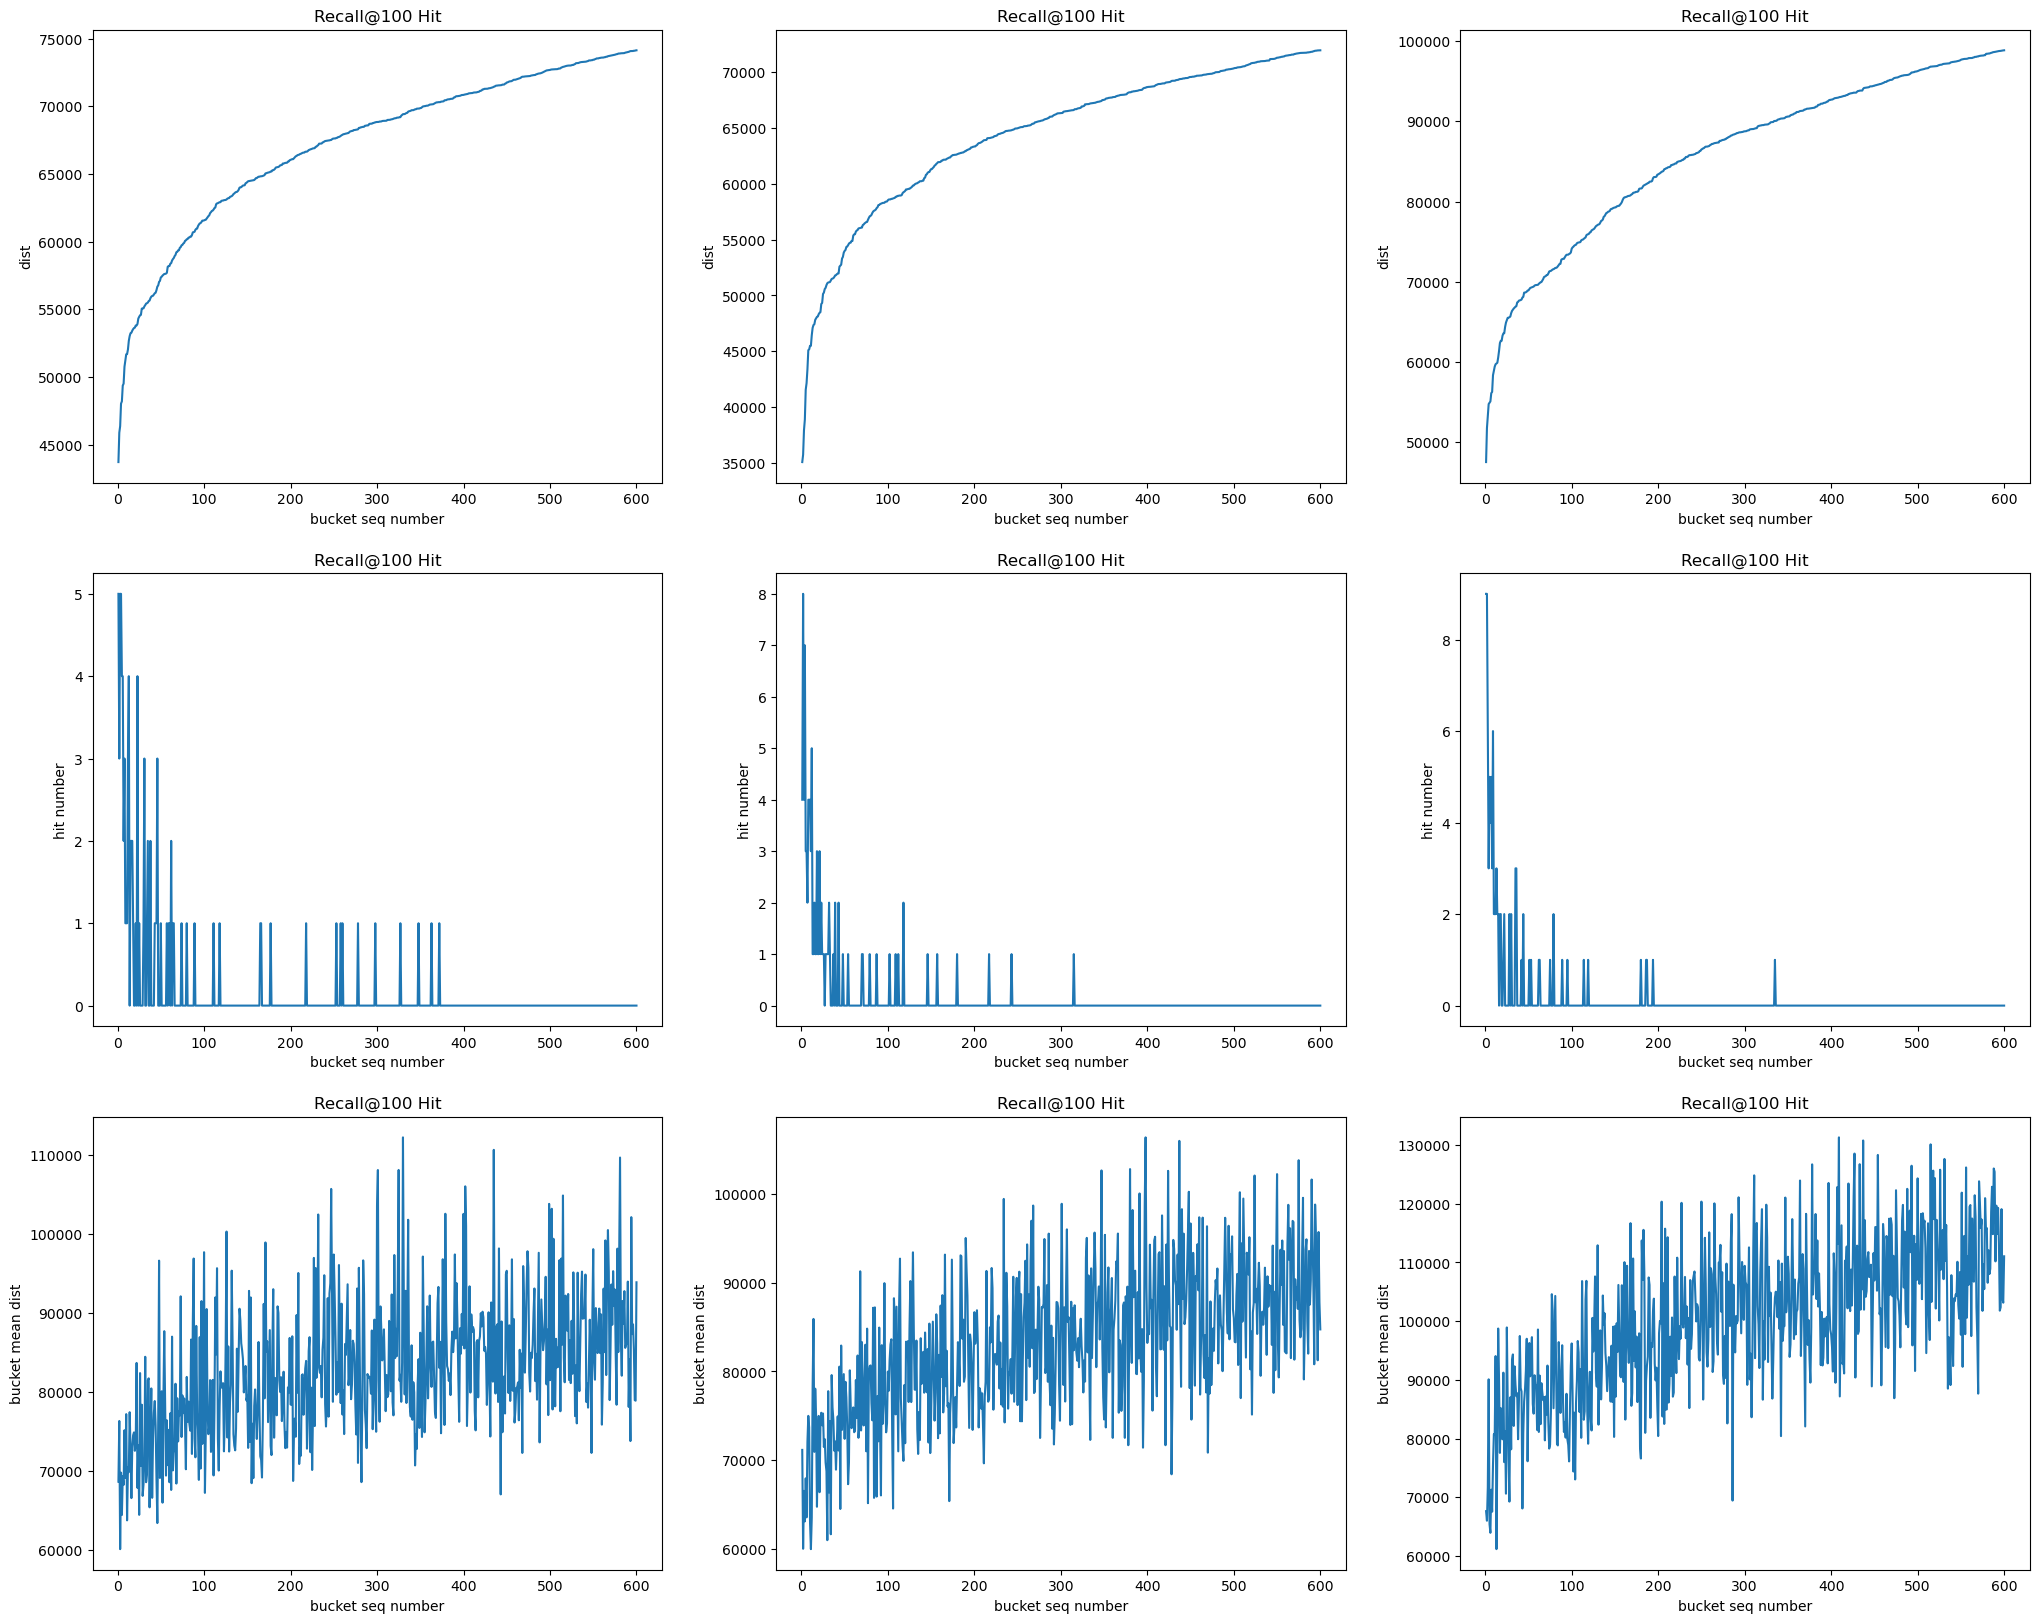

In [330]:
fig, axes = plt.subplots(3, 3, figsize=(25, 20))
plot_dist(axes[0][0])
plot_hit(axes[1][0])
# plot_hit2(axes[2][0])
plot_mean_dist(axes[2][0])

plot_dist(axes[0][1], 1024, "/tmp/stat/bucket2.txt")
plot_hit(axes[1][1], 1024, "/tmp/stat/bucket2.txt")
# plot_hit2(axes[2][1], 1024, "/tmp/stat/bucket2.txt")
plot_mean_dist(axes[2][1], 1024, "/tmp/stat/bucket2.txt")

plot_dist(axes[0][2], 2222, "/tmp/stat/bucket.3txt")
plot_hit(axes[1][2], 2222, "/tmp/stat/bucket.3txt")
# plot_hit2(axes[2][2], 2222, "/tmp/stat/bucket2.txt")
plot_mean_dist(axes[2][2], 2222, "/tmp/stat/bucket.3txt")

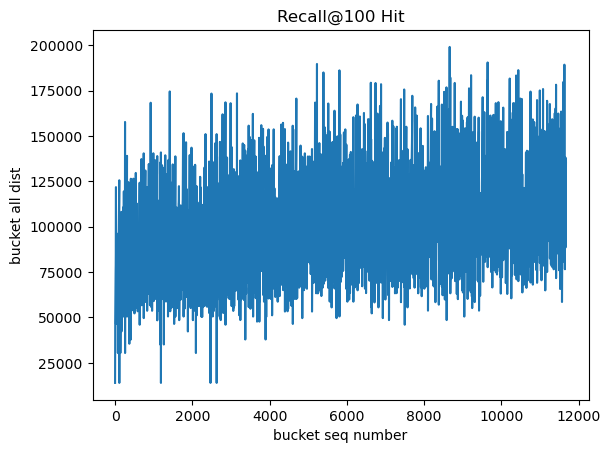

In [322]:
ax = plt.subplot()
plot_all_dist(ax, 2222, "/tmp/stat/bucket.3txt")

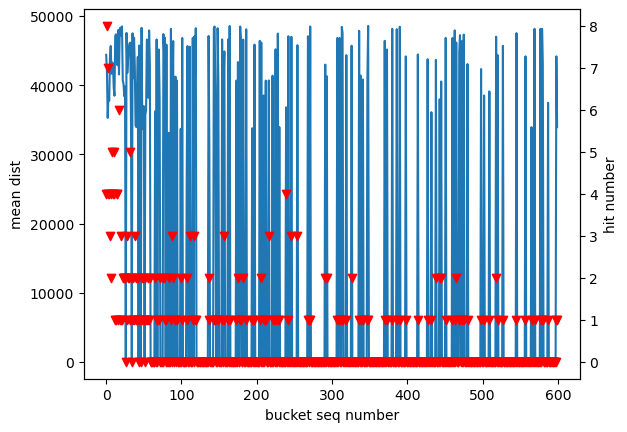

In [323]:
plot_hit_mean_dist(1024, "/tmp/stat/bucket2.txt")


In [331]:
def dist_fn(v1, v2):
  return np.square(v1 - v2).sum()

def plot_hit_dist_order(qi = 200, bucket_path = "/tmp/stat/bucket.txt"):
  query = queries[qi]
  
  gt_i = gt[qi]
  rest = set(gt_i)

  # issue_size = []
  fb = open(bucket_path, "r")
  lines = reversed(fb.readlines())
  dists = []
  index = []
  hits = []
  for line in lines:
    if line is None:
      break
    line_split = line.split(' ')[:-1]
    line_num = [int(i) for i in line_split]
    hit = set(line_num).intersection(rest)
    # rest = rest.difference(hit)
    if len(hit) > 0:
      hist_dists = [dist_fn(base[iid], query) for iid in hit]
    
    dists += hist_dists
    sub_index = [list(gt_i).index(x) for x in hit]
    index += sub_index
  fb.close()

  fig, ax = plt.subplots()
  ax.bar(index, dists)
  # ax.set_xlabel('bucket seq number')  
  # ax.set_ylabel('mean dist')  
  # ax.plot(list(range(len(dists))), dists)

  # ax1 = ax.twinx()
  # ax1.set_ylabel('hit number')
  # ax1.scatter(list(range(len(dists))), hits, color='r', marker='v')


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (227,) and arg 1 with shape (833,).

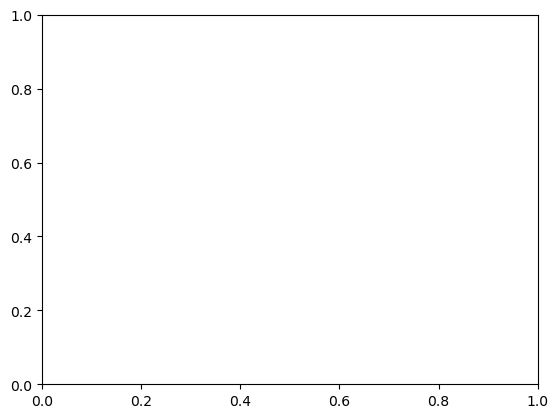

In [332]:
plot_hit_dist_order()